In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [3]:
df=pd.read_csv('processed_features.csv')

In [4]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Label',axis=1), df['Label'], test_size=0.2, random_state=42)


In [5]:
print('Training data shape:',X_train.shape)

Training data shape: (41972, 50)


In [6]:
X_train.head()

,Src_Port,Dst_Port,Packet_Size_Distribution,Flow_Pkts/s,Bwd_Pkts/s,Fwd_Pkts/s,Packet_Rate,Flow_IAT_Mean,Bwd_Header_Len,Flow_IAT_Std,...,Fwd_Pkt_Len_Mean,Fwd_Seg_Size_Avg,Active_Mean,Active_Max,Active_Min,Init_Bwd_Win_Byts,Fwd_IAT_Tot,Fwd_Pkt_Len_Std,Fwd_IAT_Max,FIN_Flag_Cnt
31706,-0.748301,-0.167995,0.693612,-0.048584,-0.053240,-0.043630,-0.043630,0.789005,-0.046386,-0.622245,...,-0.837720,-0.837720,-0.074758,-0.079432,-0.063503,-0.026364,-0.466134,-1.039993,-0.631040,-0.098288
44127,-0.742562,-0.167995,-0.737530,-0.048579,-0.053233,-0.043626,-0.043626,-0.407553,-0.013383,1.454455,...,0.634571,0.634571,-0.074629,-0.079328,-0.063366,-0.054061,1.411116,0.945449,2.373080,-0.098288
24626,-0.202258,-0.167995,-0.737530,-0.048535,-0.053178,-0.043594,-0.043594,-0.596678,-0.013383,-0.151408,...,0.342063,0.342063,-0.074758,-0.079432,-0.063503,-0.028881,-0.466114,0.550990,-0.631011,-0.098288
48485,0.574693,-0.167995,0.693612,-0.048584,-0.053241,-0.043630,-0.043630,1.031502,-0.046386,-0.622245,...,-0.837720,-0.837720,-0.074758,-0.079432,-0.063503,-0.026364,-0.466134,-1.039993,-0.631040,-0.098288
17286,0.435102,-0.167995,0.693612,-0.048574,-0.053230,-0.043620,-0.043620,-0.495417,-0.020717,0.912506,...,0.171433,0.171433,-0.074583,-0.079291,-0.063316,-0.054061,1.582475,0.531419,2.008372,-0.098288


In [7]:
print('Testing data shape:',X_test.shape)

Testing data shape: (10494, 50)


In [8]:
X_test.head()

,Src_Port,Dst_Port,Packet_Size_Distribution,Flow_Pkts/s,Bwd_Pkts/s,Fwd_Pkts/s,Packet_Rate,Flow_IAT_Mean,Bwd_Header_Len,Flow_IAT_Std,...,Fwd_Pkt_Len_Mean,Fwd_Seg_Size_Avg,Active_Mean,Active_Max,Active_Min,Init_Bwd_Win_Byts,Fwd_IAT_Tot,Fwd_Pkt_Len_Std,Fwd_IAT_Max,FIN_Flag_Cnt
20021,0.717829,-0.167995,-0.737530,-0.048570,-0.053222,-0.043620,-0.043620,-0.524275,-0.013383,0.791359,...,0.800326,0.800326,-0.074758,-0.079432,-0.063503,-0.054061,-0.373661,1.168975,-0.483067,-0.098288
40601,0.616385,-0.167995,-0.737530,-0.048564,-0.053214,-0.043615,-0.043615,-0.554741,-0.013383,0.078466,...,0.572820,0.572820,-0.074413,-0.079154,-0.063135,-0.028881,0.175028,0.862174,0.394962,-0.098288
18622,0.948737,-0.167995,0.693612,-0.048584,-0.053240,-0.043630,-0.043630,0.695391,-0.046386,-0.622245,...,-0.837720,-0.837720,-0.074758,-0.079432,-0.063503,-0.026364,-0.466134,-1.039993,-0.631040,-0.098288
18152,0.763909,-0.167995,0.693612,-0.048583,-0.053239,-0.043629,-0.043629,0.369707,-0.046386,-0.622245,...,-0.837720,-0.837720,-0.074758,-0.079432,-0.063503,-0.026364,-0.466134,-1.039993,-0.631040,-0.098288
30686,0.540091,-0.167995,0.693612,-0.048586,-0.053242,-0.043631,-0.043631,4.349654,-0.046386,-0.622245,...,-0.837720,-0.837720,-0.074758,-0.079432,-0.063503,-0.008738,-0.466134,-1.039993,-0.631040,-0.098288


In [9]:
y_train.shape

(41972,)

In [10]:
y_train.head()

31706    0
44127    0
24626    0
48485    0
17286    0
Name: Label, dtype: int64

In [11]:
y_test.shape

(10494,)

In [12]:
y_test.head()

20021    0
40601    0
18622    0
18152    0
30686    0
Name: Label, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Define a function to evaluate the model
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]  # For ROC curve and AUC

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    cm = confusion_matrix(y_val, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'AUC: {roc_auc:.4f}')
    print('Confusion Matrix:')
    print(cm)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    # Plot Confusion Matrix
    plt.subplot(1, 3, 2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Normal', 'Anomaly'], 
                yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    plt.tight_layout()
    plt.show()


Logistic Regression:
Accuracy: 0.9996
Precision: 0.9970
Recall: 0.9911
F1 Score: 0.9941
AUC: 1.0000
Confusion Matrix:
[[10155     1]
 [    3   335]]


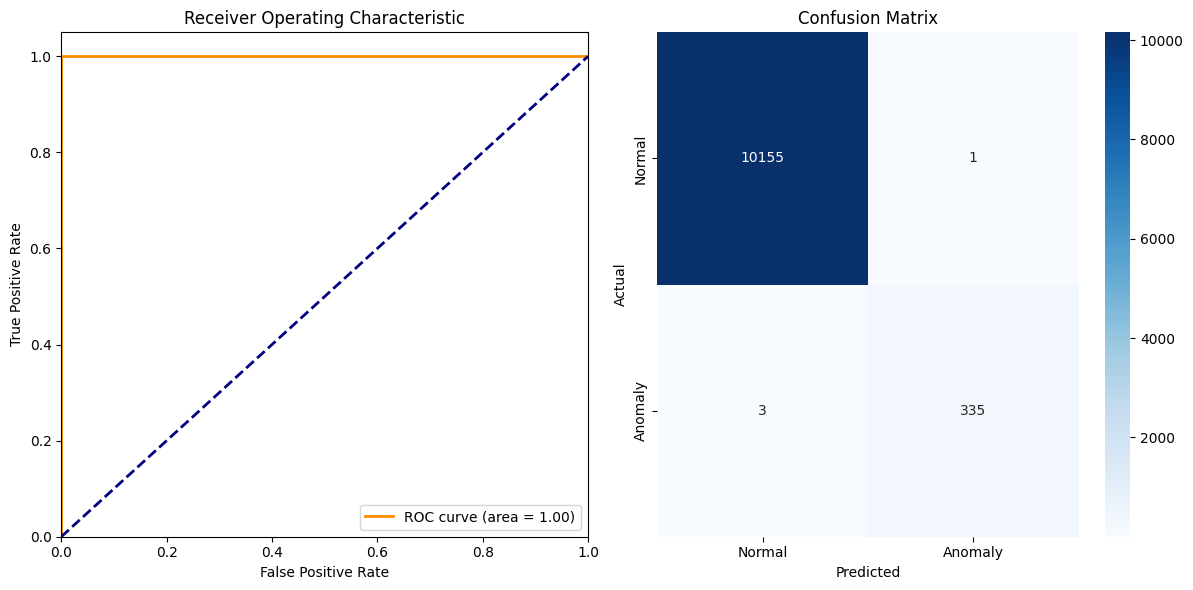

In [14]:
# Train and evaluate Logistic Regression with regularization
print("Logistic Regression:")
lr_model = LogisticRegression(max_iter=1000, C=0.1, penalty='l2', solver='liblinear')
lr_model.fit(X_train, y_train)
evaluate_model(lr_model, X_test, y_test)


Random Forest:


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC: 1.0000
Confusion Matrix:
[[10156     0]
 [    0   338]]


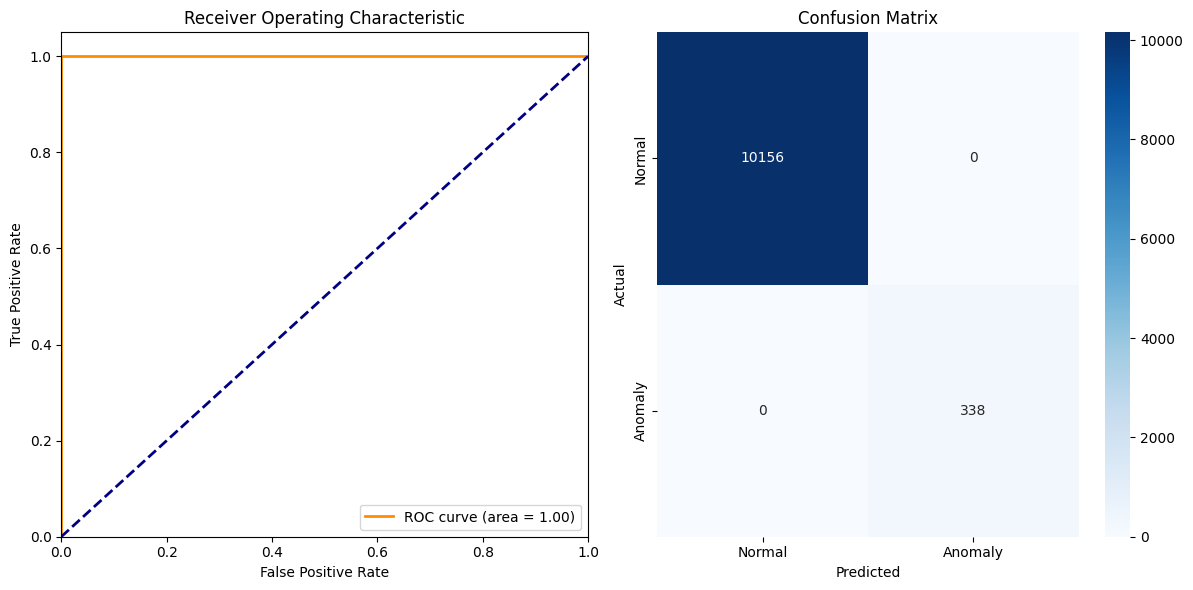

In [15]:

# Train and evaluate Random Forest
print("\nRandom Forest:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1, verbose=1, max_depth=10)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)




XGBoost:


c:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:28:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC: 1.0000
Confusion Matrix:
[[10156     0]
 [    0   338]]


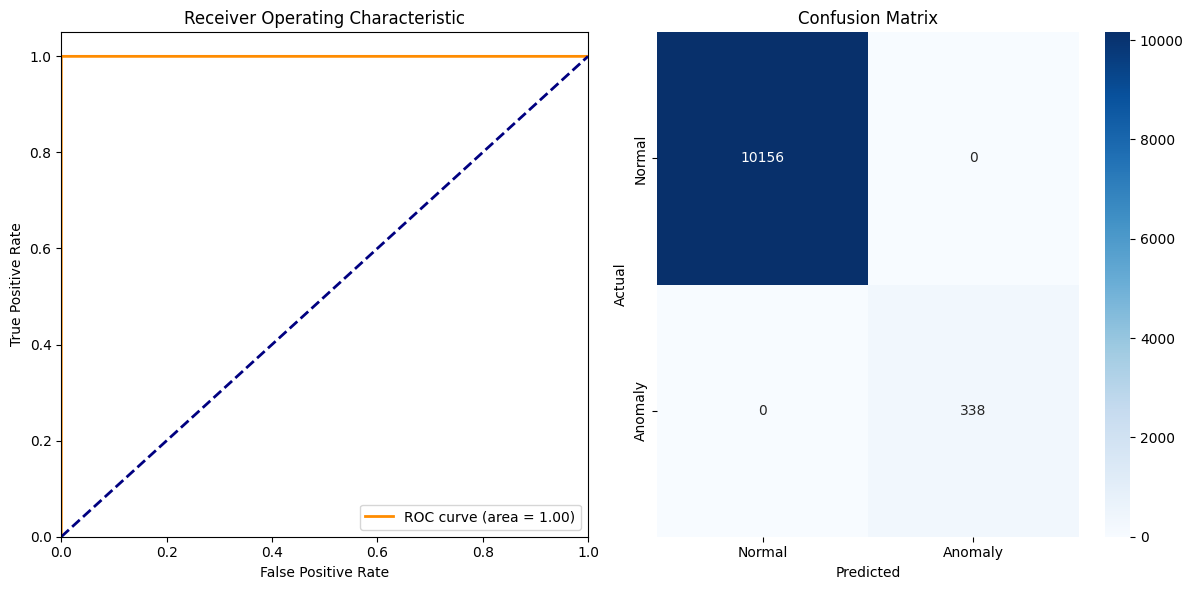

In [16]:


# Train and evaluate XGBoost
print("\nXGBoost:")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=1000, max_depth=20, learning_rate=0.1, random_state=42, n_jobs=-1, verbosity=1)
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test)




LightGBM:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC: 1.0000
Confusion Matrix:
[[10156     0]
 [    0   338]]


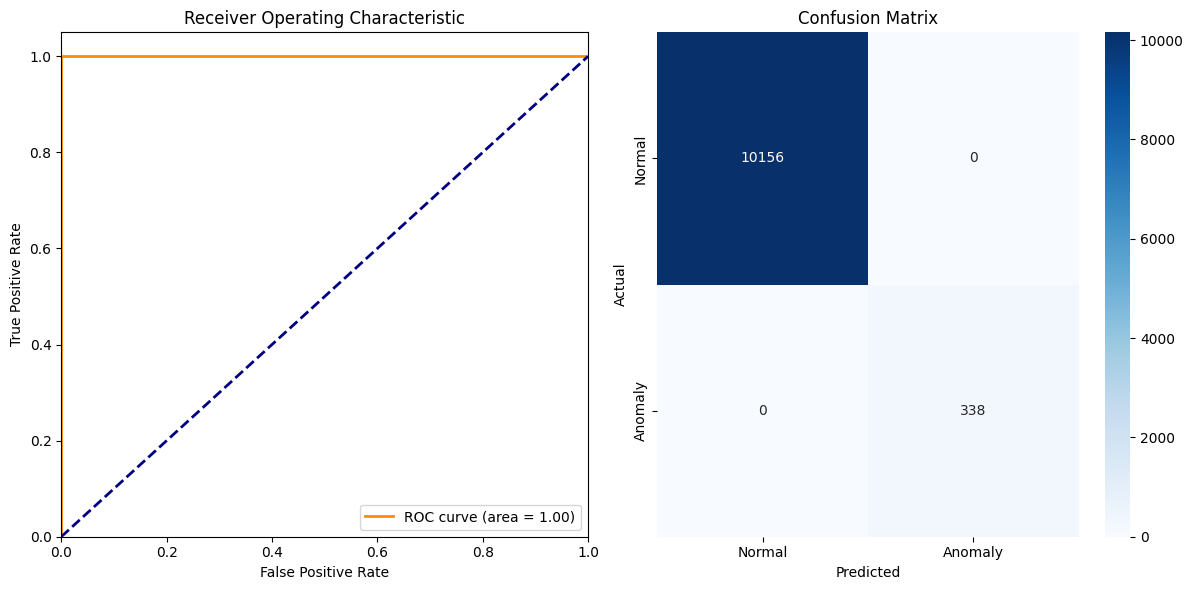

In [17]:


# Train and evaluate LightGBM
print("\nLightGBM:")
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42, n_jobs=-1, verbose=-1)
lgbm_model.fit(X_train, y_train)
evaluate_model(lgbm_model, X_test, y_test)
